C:\Users\epiph\AppData\Local\Temp\ipykernel_21384\2514830564.py:57: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred_ball_tree = np.array([mode(y_train[ind[i]]).mode[0] for i in range(len(ind))])
C:\Users\epiph\AppData\Local\Temp\ipykernel_21384\2514830564.py:61: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `ke

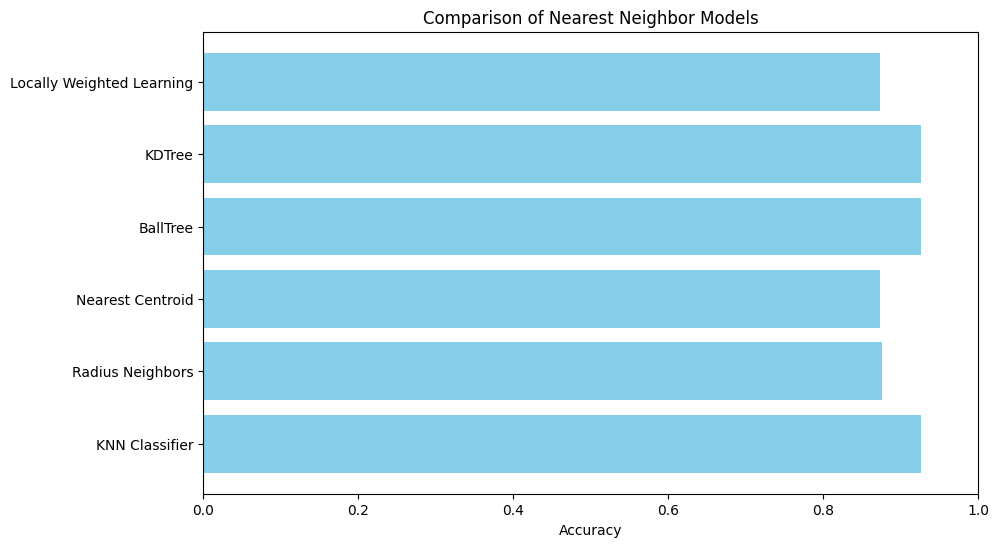

KNN Accuracy: 0.9267
Radius Neighbors Accuracy: 0.8767
Nearest Centroid Accuracy: 0.8733
BallTree Accuracy: 0.9267
KDTree Accuracy: 0.9267
Locally Weighted Learning Accuracy: 0.8733


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid, BallTree, KDTree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import shuffle

# Generate synthetic dataset
# Generate synthetic dataset with adjusted parameters
X, y = make_classification(
    n_samples=1000,
    n_features=2,          # Total number of features
    n_informative=2,       # Number of informative features
    n_redundant=0,         # Number of redundant features
    n_repeated=0,          # Number of repeated features
    n_classes=2,           # Number of target classes
    random_state=42
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Radius Neighbors Classifier (RNC)
rnc = RadiusNeighborsClassifier(radius=1.0)
rnc.fit(X_train_scaled, y_train)
y_pred_rnc = rnc.predict(X_test_scaled)
accuracy_rnc = accuracy_score(y_test, y_pred_rnc)

# Nearest Centroid Classifier (NCC)
ncc = NearestCentroid()
ncc.fit(X_train_scaled, y_train)
y_pred_ncc = ncc.predict(X_test_scaled)
accuracy_ncc = accuracy_score(y_test, y_pred_ncc)

# BallTree / KDTree - Accelerate KNN Search
ball_tree = BallTree(X_train_scaled)
kd_tree = KDTree(X_train_scaled)

from scipy.stats import mode

# Predict using BallTree for KNN
dist, ind = ball_tree.query(X_test_scaled, k=5)
y_pred_ball_tree = np.array([mode(y_train[ind[i]]).mode[0] for i in range(len(ind))])

# Predict using KDTree for KNN
dist, ind = kd_tree.query(X_test_scaled, k=5)
y_pred_kd_tree = np.array([mode(y_train[ind[i]]).mode[0] for i in range(len(ind))])

accuracy_ball_tree = accuracy_score(y_test, y_pred_ball_tree)
accuracy_kd_tree = accuracy_score(y_test, y_pred_kd_tree)

# Locally Weighted Learning (LWL)
def locally_weighted_learning(X_train, y_train, X_test, tau=1.0):
    y_pred = []
    for x in X_test:
        weights = np.exp(-np.sum((X_train - x) ** 2, axis=1) / (2 * tau ** 2))
        weighted_avg = np.sum(weights * y_train) / np.sum(weights)
        y_pred.append(weighted_avg)
    return np.array(y_pred)

y_pred_lwl = locally_weighted_learning(X_train_scaled, y_train, X_test_scaled)
accuracy_lwl = accuracy_score(y_test, (y_pred_lwl > 0.5).astype(int))

# Plot results
model_names = ['KNN Classifier', 'Radius Neighbors', 'Nearest Centroid', 'BallTree', 'KDTree', 'Locally Weighted Learning']
accuracies = [accuracy_knn, accuracy_rnc, accuracy_ncc, accuracy_ball_tree, accuracy_kd_tree, accuracy_lwl]

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Nearest Neighbor Models')
plt.xlim(0, 1.0)
plt.show()

# Print accuracies
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Radius Neighbors Accuracy: {accuracy_rnc:.4f}")
print(f"Nearest Centroid Accuracy: {accuracy_ncc:.4f}")
print(f"BallTree Accuracy: {accuracy_ball_tree:.4f}")
print(f"KDTree Accuracy: {accuracy_kd_tree:.4f}")
print(f"Locally Weighted Learning Accuracy: {accuracy_lwl:.4f}")


### **最近邻模型总结**

以下是代码中涉及的所有最近邻模型的总结，包括它们的 **特点**、**适用场景** 和 **优缺点**：

---

### **1. K-Nearest Neighbors (KNN)**
- **特点**：
  - 基于欧几里得距离（或其他距离度量）的分类算法。
  - 对于测试样本，找到训练集中最近的 `k` 个邻居，通过投票决定分类结果。

- **适用场景**：
  - 小规模数据集，类别边界模糊的分类任务。
  - 图像分类、文本分类等。

- **优点**：
  - 简单易懂，易于实现。
  - 无需模型训练，适合小规模数据。
  - 能处理多分类任务。

- **缺点**：
  - 计算开销大，尤其是样本量大时。
  - 对高维数据表现较差（维度灾难）。
  - 对异常值敏感。

---

### **2. Radius Neighbors Classifier (RNC)**
- **特点**：
  - 使用一个固定半径，选择在此半径内的所有邻居进行分类。
  - 半径范围内的样本数量决定分类结果。

- **适用场景**：
  - 样本分布密度差异较大的场景。
  - 类别之间边界模糊，且类别分布不均匀的数据。

- **优点**：
  - 可以动态选择邻居数量，无需固定 `k` 值。
  - 适用于密度分布不均的场景。

- **缺点**：
  - 半径的选择对性能影响较大。
  - 当样本密度过低时，可能找不到足够的邻居。

---

### **3. Nearest Centroid Classifier (NCC)**
- **特点**：
  - 计算每个类别的质心，测试样本与质心的距离决定分类结果。
  - 假设类别之间的分布是高斯分布或接近对称的。

- **适用场景**：
  - 类别之间边界清晰、分布均匀的情况。
  - 分类问题中，模型需要快速预测或存储开销较低。

- **优点**：
  - 简单高效，训练和预测速度快。
  - 存储需求低，仅需保存质心。

- **缺点**：
  - 对异常值敏感，可能导致质心偏移。
  - 对类别分布不均的情况表现较差。

---

### **4. BallTree**
- **特点**：
  - 使用树形结构加速最近邻查询，适合高维数据。
  - 基于球体分割数据空间，构建一棵树。

- **适用场景**：
  - 大规模、高维数据的最近邻查询任务。
  - 用于加速 KNN 等基于距离的模型。

- **优点**：
  - 对高维数据的最近邻查询性能优于 `KDTree`。
  - 在样本数量大时表现出色。

- **缺点**：
  - 构建树的时间开销较大。
  - 在低维数据上性能提升不明显。

---

### **5. KDTree**
- **特点**：
  - 使用树形结构加速最近邻查询，适合低维数据。
  - 基于超平面分割数据空间，构建一棵树。

- **适用场景**：
  - 大规模、低维数据的最近邻查询任务。
  - 用于加速 KNN 等基于距离的模型。

- **优点**：
  - 对低维数据的最近邻查询性能优于 `BallTree`。
  - 能有效加速 KNN 的预测过程。

- **缺点**：
  - 对高维数据的性能下降明显。
  - 构建树的时间开销较大。

---

### **6. Locally Weighted Learning (LWL)**
- **特点**：
  - 基于局部加权的学习方法，邻居的权重与测试样本的距离成反比。
  - 使用核函数（如高斯核）对邻居进行加权。

- **适用场景**：
  - 数据分布复杂、非线性分类任务。
  - 对局部数据特性敏感的场景。

- **优点**：
  - 能适应复杂的非线性数据分布。
  - 灵活性高，可以通过调整核函数和参数适配不同数据。

- **缺点**：
  - 计算开销大，尤其是需要计算每个样本与所有邻居的距离。
  - 适合小规模数据，不适合大规模数据。

---

### **总结对比表**

| **模型**                    | **特点**                                                | **适用场景**                                    | **优点**                                  | **缺点**                                |
|-----------------------------|-------------------------------------------------------|------------------------------------------------|-------------------------------------------|-----------------------------------------|
| **KNN**                     | 基于欧几里得距离投票                                   | 小规模分类任务，类别边界模糊                   | 简单易懂，无需训练                        | 高计算开销，对异常值敏感                |
| **Radius Neighbors (RNC)**  | 基于固定半径范围内邻居数量                             | 类别分布不均的场景                             | 无需指定 `k` 值，适合分布密度差异大的场景 | 半径选择困难，密度过低时性能较差        |
| **Nearest Centroid (NCC)**  | 基于类别质心，计算距离                                 | 类别边界清晰、分布均匀的数据                   | 简单高效，训练和预测速度快                | 对异常值敏感，类别分布不均时性能较差    |
| **BallTree**                | 树形结构加速最近邻查询，基于球体分割                   | 高维数据的最近邻查询                           | 高维数据表现优异，加速查询                | 构建时间较长，低维数据性能提升有限      |
| **KDTree**                  | 树形结构加速最近邻查询，基于超平面分割                 | 低维数据的最近邻查询                           | 低维数据表现优异，加速查询                | 高维数据性能较差，构建时间较长          |
| **Locally Weighted Learning (LWL)** | 局部加权学习，使用核函数对邻居加权                | 非线性分类任务，局部数据特性敏感的场景         | 能适应复杂非线性数据，灵活性高            | 计算开销大，适合小规模数据              |

---

### **选型建议**
1. **小规模数据**：
   - **线性分类**：`KNN`、`Radius Neighbors`。
   - **非线性分类**：`Locally Weighted Learning`。
2. **大规模数据**：
   - **高维数据**：`BallTree`。
   - **低维数据**：`KDTree`。
3. **边界清晰的分类任务**：`Nearest Centroid`。
